In [ ]:
#----------------------------ASSIGNMENT-7-------------------------------!

In [ ]:
#---------------------------LOGISTIC REGRESSION-------------------------!

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import streamlit as st
import joblib

# Step 1: Data Exploration
# Load the dataset
data = pd.read_csv("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\Logistic Regression\\Titanic_test.csv")

# Perform exploratory data analysis (EDA)
print("Dataset Shape:", data.shape)
print("First few rows:\n", data.head())
print("\nFeature Types:\n", data.dtypes)
print("\nSummary Statistics:\n", data.describe())

Dataset Shape: (418, 11)
First few rows:
    PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Feature Types:
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
Sib

In [57]:
#Data Exploration
# Loading datasets
train_data = pd.read_csv("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\Logistic Regression\\Titanic_train.csv")
test_data = pd.read_csv("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\Logistic Regression\\Titanic_test.csv")

In [59]:
# Display first few rows of the train dataset
print("Train Dataset Overview:")
print(train_data.head())

Train Dataset Overview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

In [61]:
# Display first few rows of the test dataset
print("\nTest Dataset Overview:")
print(test_data.head())


Test Dataset Overview:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [63]:
# Display dataset information
print("\nTrain Dataset Info:")
train_data.info()


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
print("\nTest Dataset Info:")
test_data.info()


Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [67]:
# Summary statistics
print("\nSummary Statistics for Train Dataset:")
print(train_data.describe())
print("\n")
print("\nSummary Statistics for Test Dataset:")
print(test_data.describe())


Summary Statistics for Train Dataset:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  



Summary Statistics for Test Dataset:
  

In [69]:
# Check for missing values
print("\nMissing Values in Train Dataset:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Dataset:")
print(test_data.isnull().sum())


Missing Values in Train Dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values in Test Dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [71]:
# Fill missing Age values with median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
# Fill missing Embarked values with mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
# Fill missing Fare value in test dataset with median
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
# Drop the Cabin column if it's deemed unnecessary
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [73]:
# Check again for missing values
print("\nMissing Values in Train Dataset:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Dataset:")
print(test_data.isnull().sum())


Missing Values in Train Dataset:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing Values in Test Dataset:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


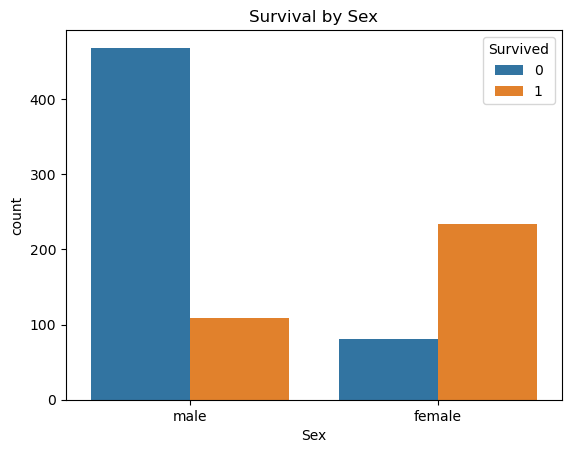

In [75]:
# Analyze categorical variables
sns.countplot(data=train_data, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

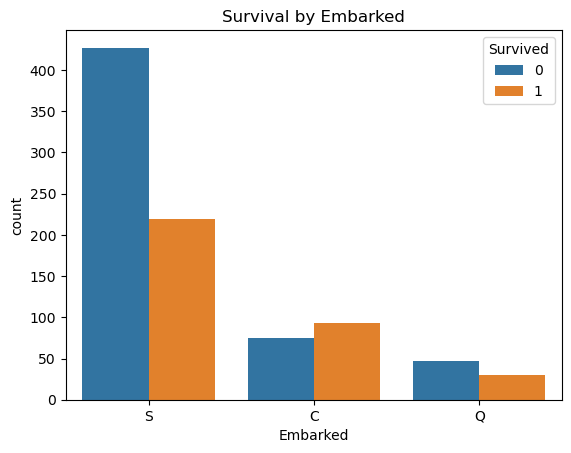

In [77]:
sns.countplot(data=train_data, x='Embarked', hue='Survived')
plt.title('Survival by Embarked')
plt.show()

In [79]:
#Encoding Categorical variables
# Map 'Sex' to numerical categories
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# Verify the transformation
print(train_data[['Sex']].head())
print(test_data[['Sex']].head())

   Sex
0    0
1    1
2    1
3    1
4    0
   Sex
0    0
1    1
2    0
3    0
4    1


In [81]:
# Map 'Embarked' to numerical categories
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Verify the transformation
print(train_data[['Embarked']].head())
print(test_data[['Embarked']].head())

   Embarked
0         0
1         1
2         0
3         0
4         0
   Embarked
0         2
1         0
2         2
3         0
4         0


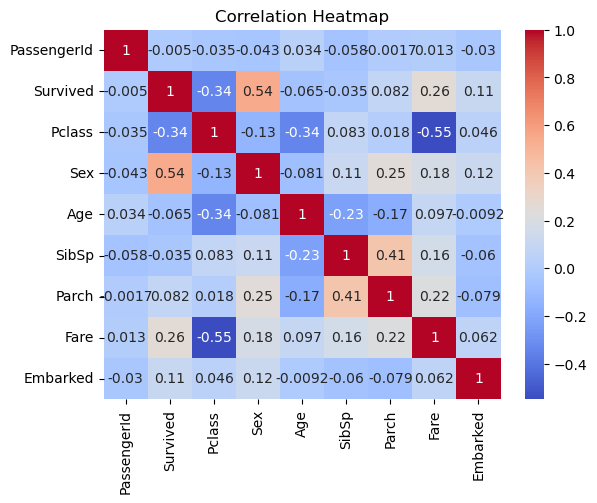

In [83]:
# Select only numeric columns for the correlation matrix
numeric_cols = train_data.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

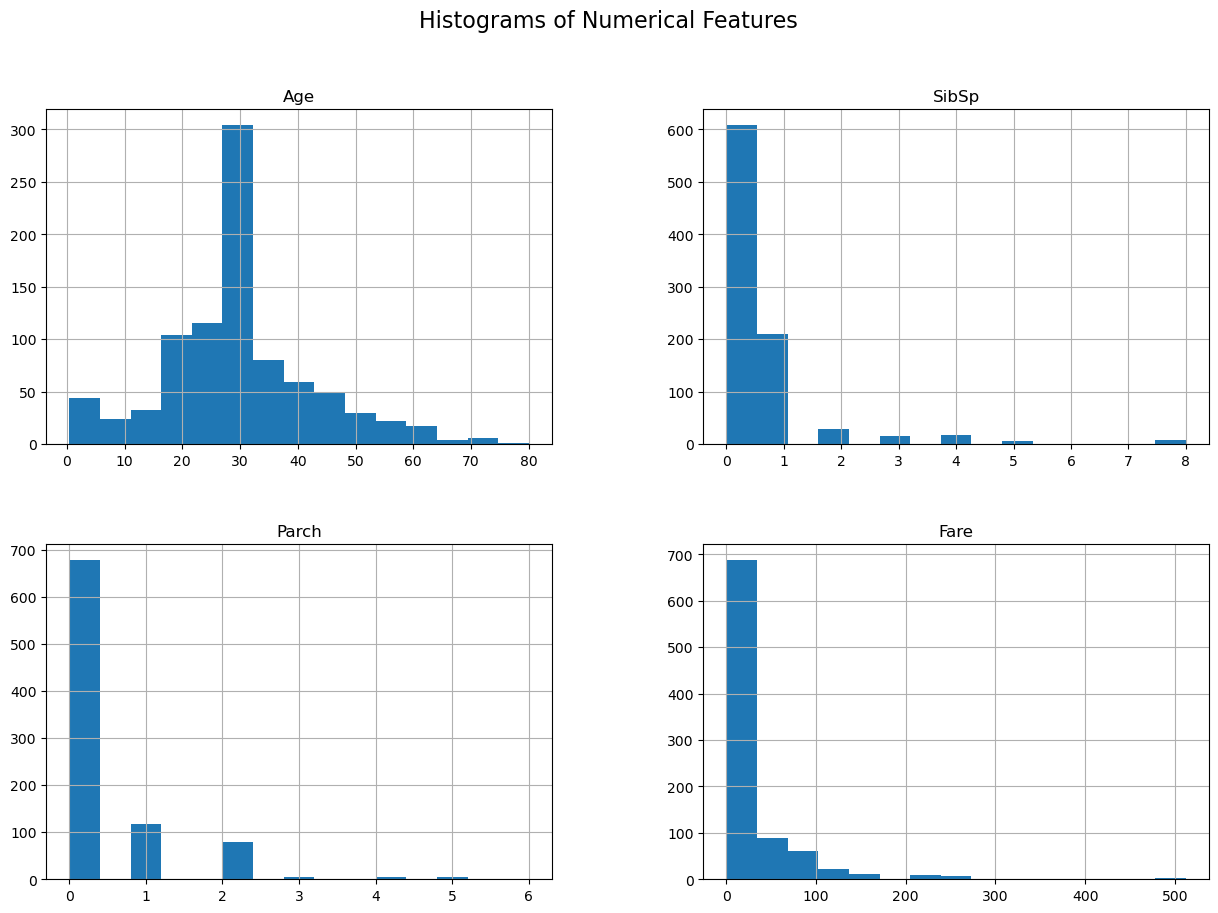

In [85]:
# 1. Histograms: Visualize distributions of numerical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
train_data[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

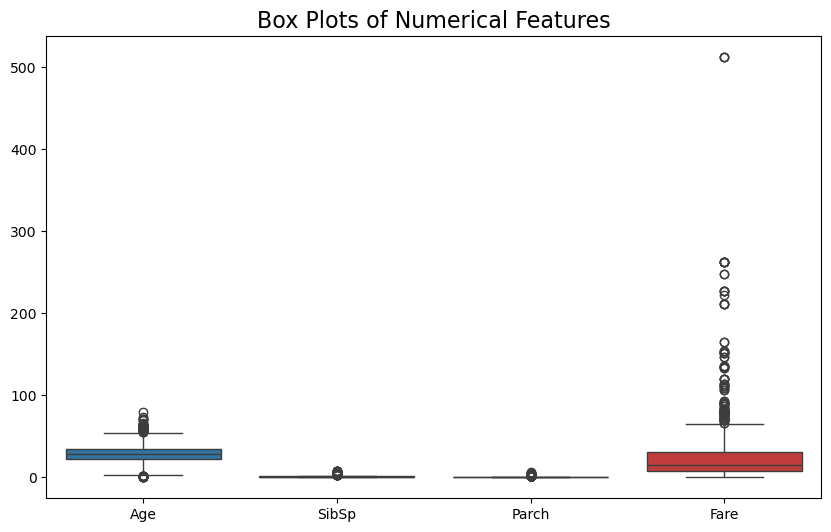

In [87]:
# 2. Box Plots: Visualize the spread of numerical features and detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data[numerical_features])
plt.title('Box Plots of Numerical Features', fontsize=16)
plt.show()

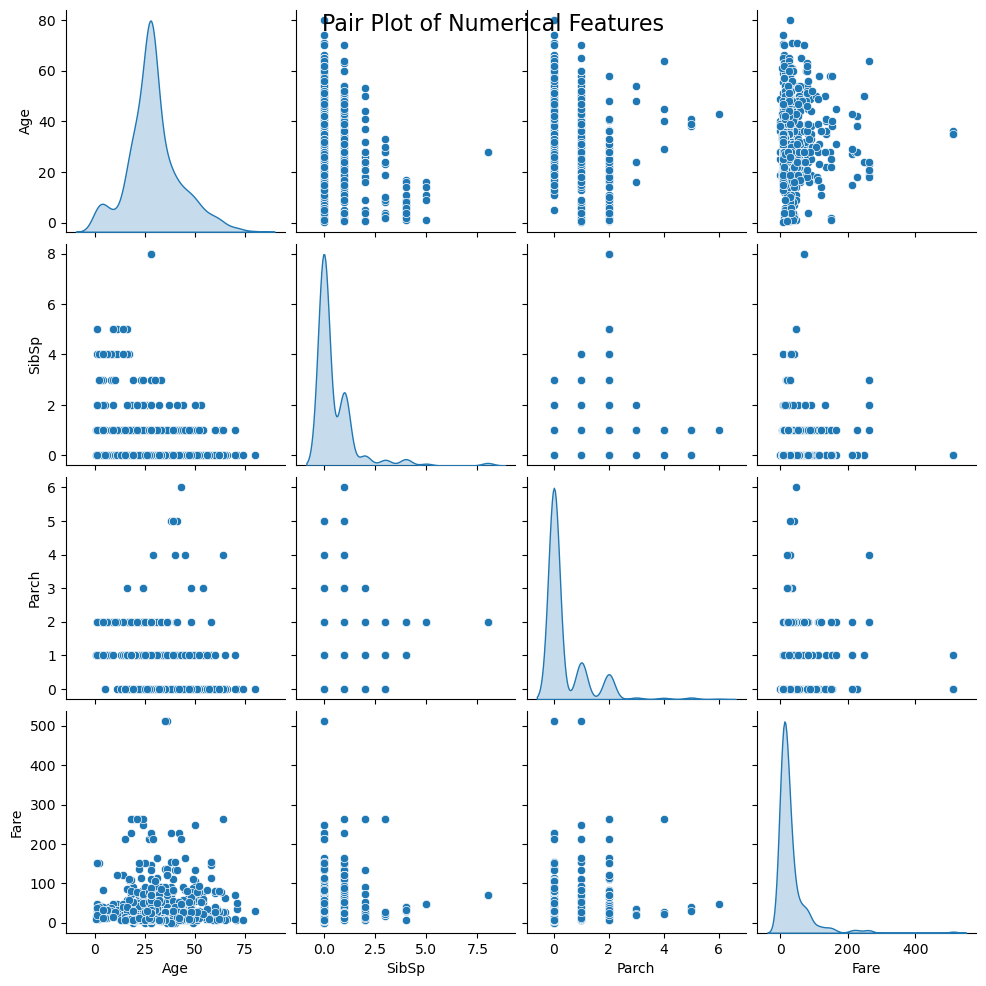

In [89]:
# 3. Pair Plot: Visualize relationships between numerical features
sns.pairplot(train_data[numerical_features], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', fontsize=16)
plt.show()

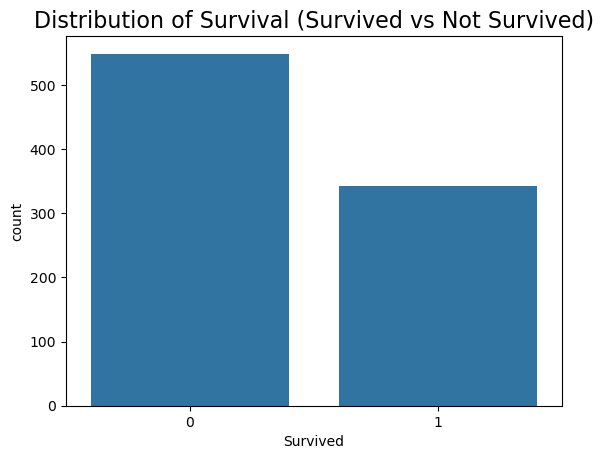

In [91]:
# 4. Distribution of the target variable (Survived)
sns.countplot(data=train_data, x='Survived')
plt.title('Distribution of Survival (Survived vs Not Survived)', fontsize=16)
plt.show()

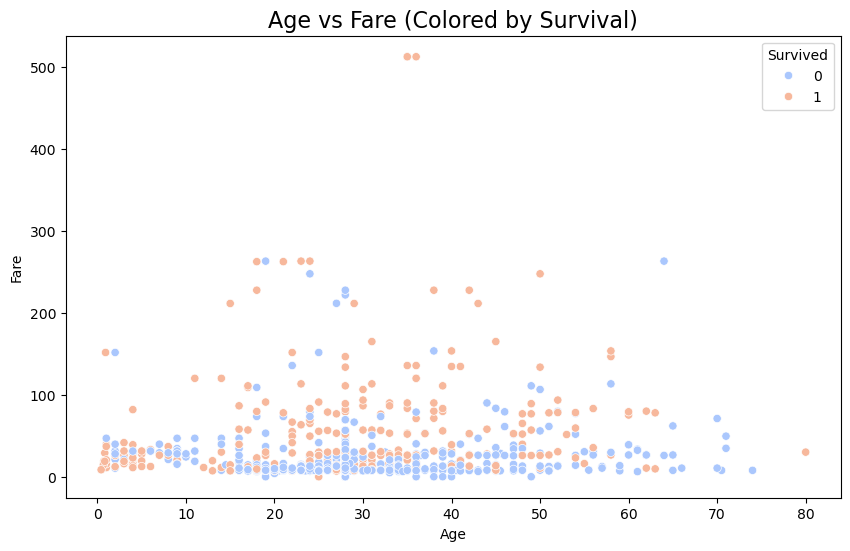

In [95]:
# 5. Relationship between 'Age' and 'Fare' using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Age', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Age vs Fare (Colored by Survival)', fontsize=16)
plt.show()

In [97]:
# Revert 'Sex' back to categorical representation
train_data['Sex'] = train_data['Sex'].map({0: 'male', 1: 'female'})
test_data['Sex'] = test_data['Sex'].map({0: 'male', 1: 'female'})

# Verify the transformation
print(train_data[['Sex']].head())
print(test_data[['Sex']].head())

      Sex
0    male
1  female
2  female
3  female
4    male
      Sex
0    male
1  female
2    male
3    male
4  female


In [99]:
# Map 'Embarked' to numerical categories
train_data['Embarked'] = train_data['Embarked'].map({0: 'S', 1: 'C', 2: 'Q'})
test_data['Embarked'] = test_data['Embarked'].map({0: 'S', 1: 'C', 2: 'Q'})

# Verify the transformation
print(train_data[['Embarked']].head())
print(test_data[['Embarked']].head())

  Embarked
0        S
1        C
2        S
3        S
4        S
  Embarked
0        Q
1        S
2        Q
3        S
4        S


In [103]:
def preprocess_data(df):
    """Preprocess data consistently for both training and prediction"""
    # Create a copy to avoid modifying the original dataframe
    df = df.copy()

    # Handle missing values
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

    # Encode categorical variables
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    # Select features in consistent order
    feature_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    return df[feature_columns]


In [109]:
X = preprocess_data(train_data)
y = train_data['Survived']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# Fit scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [115]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [117]:
y_pred = model.predict(X_val_scaled)


In [119]:
#Evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.7989
Precision: 0.7714
Recall: 0.7297
F1 Score: 0.7500
ROC-AUC Score: 0.7887


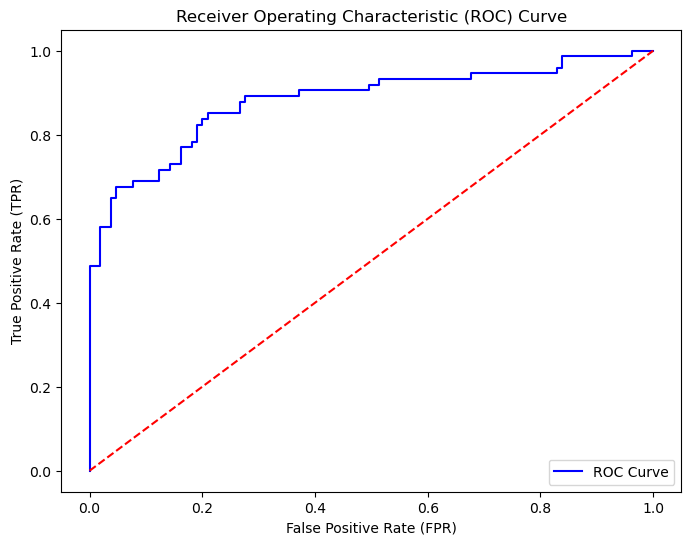

In [121]:
#Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')  # Diagonal line (random classifier)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

In [123]:
# Getting the coefficients of the logistic regression model
coefficients = model.coef_[0]
features = X.columns
# Display coefficients with feature names
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df['Odds Ratio'] = coef_df['Coefficient'].apply(lambda x: round(np.exp(x), 4))  # Convert to odds ratio
print(coef_df)

    Feature  Coefficient  Odds Ratio
0    Pclass    -0.804272      0.4474
1       Sex     1.270916      3.5641
2       Age    -0.404834      0.6671
3     SibSp    -0.359839      0.6978
4     Parch    -0.089298      0.9146
5      Fare     0.143666      1.1545
6  Embarked     0.140339      1.1507


In [ ]:
The coefficients in logistic regression show how the log-odds of the target variable—in this case, survival—change as the corresponding feature increases by one unit. 
We also calculate the odds ratio, which indicates the amount that the odds of survival change when a specific attribute rises by one unit, to facilitate comprehension.

In [ ]:
1)Sex (1.2709, OR 3.56): Women and children were given priority in lifeboats, with females having 3.56 times the odds of surviving compared to males.
2)Age (-0.4048, OR 0.67): The chances of survival decreased by 33% for older travelers.
3)SibSp (-0.3598, OR 0.70): The odds of survival were somewhat lower for larger family units, with a 30% drop for each extra sibling or spouse on board.
4)Parch (-0.0893, OR 0.91): Although the effect was small, having more parents or kids on board marginally reduced survival chances by 9%.
5)Fare (0.1437, OR 1.15), which reflected the advantages of wealthy travelers, increased survival probability by 15% each unit.
6)Embarked (0.1403, OR 1.15): Because they had better access to lifeboats, passengers from specific ports had a 15% higher chance of surviving.

In [ ]:
#Conclusion

In this model, the most important determinants of survival are Fare, Age, Pclass, and Sex. 
The model's predictions are most affected by these characteristics. 
Family-related traits like SibSp and Parch, on the other hand, have less of an impact but still influence the chance of survival overall. 
It will be easier to explain how gender, class, age, and income affected survival during the Titanic disaster if these linkages are understood.

In [125]:
# Save model, scaler and feature columns
joblib.dump(model, 'titanic_model.pkl')
joblib.dump(scaler, 'titanic_scaler.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')

['feature_columns.pkl']

In [ ]:
#titanic_app.py
'''
# app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Configure the page
st.set_page_config(
    page_title="Titanic Survival Predictor",
    page_icon="🚢",
    layout="wide"
)

@st.cache_resource
def load_model():
    """Load the trained model, scaler and feature columns"""
    try:
        model = joblib.load('titanic_model.pkl')
        scaler = joblib.load('titanic_scaler.pkl')
        feature_columns = joblib.load('feature_columns.pkl')
        return model, scaler, feature_columns
    except Exception as e:
        st.error(f"Error loading model: {str(e)}")
        return None, None, None

def create_feature_array(inputs, feature_columns):
    """Create a properly formatted feature array"""
    # Convert inputs to a pandas DataFrame with correct column order
    df = pd.DataFrame([inputs], columns=feature_columns)
    return df

def main():
    model, scaler, feature_columns = load_model()
    
    if model is None or scaler is None or feature_columns is None:
        st.error("Failed to load the model. Please check if all required files exist.")
        return

    st.title("🚢 Titanic Survival Prediction")
    st.write("""
        Enter passenger information to predict their probability of survival on the Titanic.
        This model is based on historical data from the tragic voyage.
    """)

    with st.form("prediction_form"):
        col1, col2 = st.columns(2)

        with col1:
            pclass = st.selectbox('Passenger Class', options=[1, 2, 3])
            sex = st.selectbox('Gender', options=['male', 'female'])
            age = st.number_input('Age', min_value=0.0, max_value=100.0, value=25.0)
            sibsp = st.number_input('Siblings/Spouses Aboard', min_value=0, max_value=10, value=0)

        with col2:
            parch = st.number_input('Parents/Children Aboard', min_value=0, max_value=10, value=0)
            fare = st.number_input('Ticket Fare (in £)', min_value=0.0, max_value=1000.0, value=7.25)
            embarked = st.selectbox('Port of Embarkation', options=['S', 'C', 'Q'])

        submitted = st.form_submit_button("Predict Survival Chances")

    if submitted:
        try:
            # Create inputs dictionary with encoded values
            inputs = {
                'Pclass': pclass,
                'Sex': 1 if sex == 'female' else 0,
                'Age': age,
                'SibSp': sibsp,
                'Parch': parch,
                'Fare': fare,
                'Embarked': {'S': 0, 'C': 1, 'Q': 2}[embarked]
            }
            
            # Create feature array with correct format
            features_df = create_feature_array(inputs, feature_columns)
            
            # Scale features
            scaled_features = scaler.transform(features_df)
            
            # Make prediction
            survival_proba = model.predict_proba(scaled_features)[0, 1]
            
            # Display prediction
            if survival_proba >= 0.5:
                st.success(f"Survival Probability: {survival_proba:.1%}")
            else:
                st.error(f"Non-survival Probability: {1-survival_proba:.1%}")
            
            # Display feature importance
            st.subheader("Feature Impact Analysis")
            importance = pd.DataFrame({
                'Feature': feature_columns,
                'Value': features_df.iloc[0],
                'Coefficient': model.coef_[0]
            })
            importance['Impact'] = importance['Value'] * importance['Coefficient']
            importance = importance.sort_values('Impact', key=abs, ascending=False)
            st.dataframe(importance[['Feature', 'Impact']].round(3))

        except Exception as e:
            st.error(f"Prediction Error: {str(e)}")
            st.info("Please check your input values and try again.")

if __name__ == "__main__":
    main()

'''

In [ ]:
Save the above code as titanic_app.py and Move all the code related files like "titanic_app.py titanic_model.pkl,titanic_scaler.pkl,feature_columns.pkl" 
into a single folder nad run it with vs code using 'streamlit run titanic_app.py' command then deployed website streamlit will open and show desired outputs

In [ ]:
#Outputs

In [ ]:
#Positive Chance

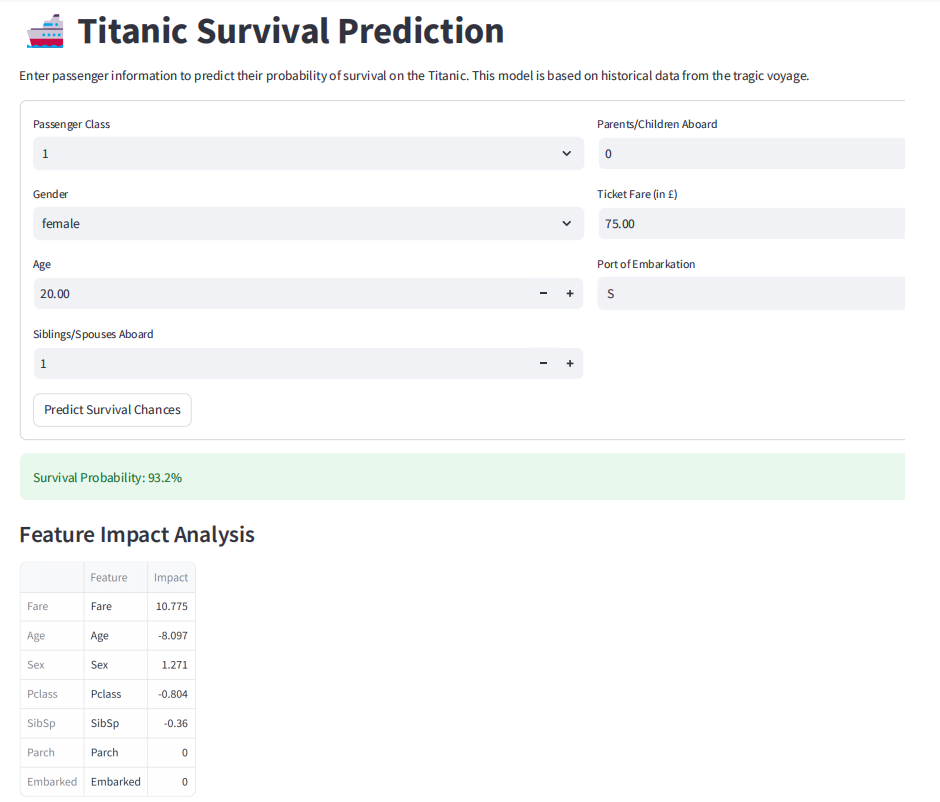

In [ ]:
#Negative Chance

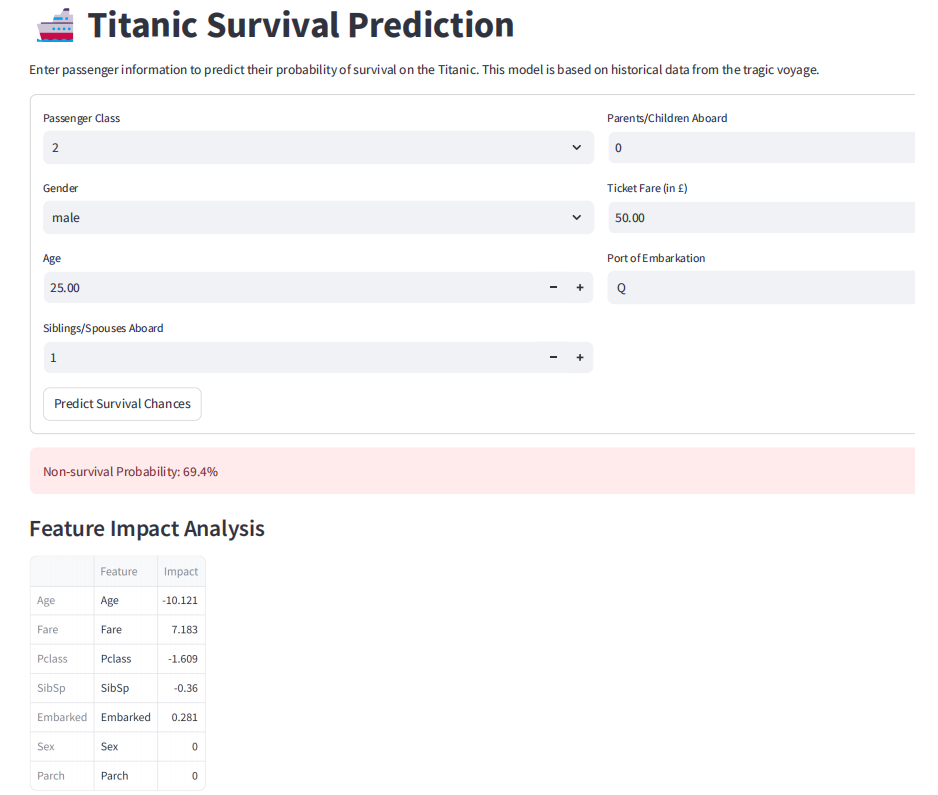

In [ ]:
#Interview Questions

In [ ]:
#1. What is the difference between precision and recall?

Answer:
         The given metrics precision and recall are used to assess how well classification models perform, particularly in binary classification. 
         Precision quantifies the proportion of the model's positive predictions that come true. 
         It is beneficial in situations where false positives are expensive, for as when diagnosing illnesses where false alarms are expensive.

        Where recall quantifies the proportion of real positives that the model accurately detects. 
        Recall is beneficial in situations when it is expensive to overlook favorable results, for as in fraud detection or medical diagnosis.

Finallly, the main emphasis of precision is to ensure quality of optimistic forecasts and the goal of recall is to record all true positives.

In [ ]:
#2. What is cross-validation, and why is it important in binary classification?

Answer:
        It is a method for evaluating a machine learning model's effectiveness and generalizability where the dataset is divided into subsets/fold's, and the model is repeatedly trained and verified using the remaining data as the training set and a separate subset as the validation set.
        The most popular technique, known as k-fold cross-validation, divides the data into k equal pieces, or folds.

#Importance of Cross-validation in binary classification:

Minimizes Overfitting: Cross-validation makes sure the model isn't unduly customized to a single subset of the data by training and validating on several folds.
Improved Generalization: By averaging the model's performance over all folds, it offers a more accurate approximation of how well the model performs on unseen data.
Deals with Unbalanced Datasets:Cross-validation helps guarantee that the model's performance indicators are not skewed by the particular split of training and testing data in binary classification, particularly when dealing with imbalanced datasets.
Model Comparison: By utilizing the same data splits, it enables an equitable comparison of various models or hyperparameter configurations.

In [ ]:
#-------------FINISH-----------------------!